In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
from google.colab.patches import cv2_imshow

In [28]:
def otsu_thresholding( img ):
    HISTOGRAM, bins = np.histogram( img , np.array( range ( 0, 256 ) ) )
    threshold = -1
    sigma_so_far = -1
    HISTOGRAM = 1.0 * HISTOGRAM / np.sum ( HISTOGRAM )
    for t in bins:
        q1 = np.sum ( HISTOGRAM [ : t ] )
        mu1 = np.sum ( bins [ : t ] * HISTOGRAM [ : t ] ) / q1
        q2 = np.sum ( HISTOGRAM [ t : ] )
        mu2 = np.sum ( bins [ t : -1 ] * HISTOGRAM [ t : ] ) / q2

        sigma = q1 * q2 * (mu1 - mu2) ** 2
        if sigma > sigma_so_far:
            threshold = t
            sigma_so_far = sigma
    output = img.copy( )
    print(threshold)
    output[img > threshold] = 255
    output[img < threshold] = 0
    return output

In [29]:
filename = '/content/julia.png'

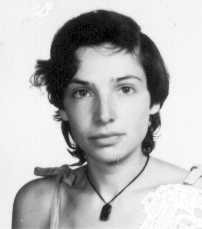

150


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


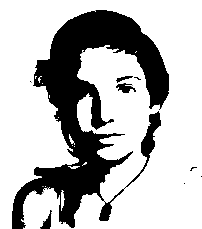

-1

In [30]:
img = cv2.imread( filename )
cv2_imshow(img )
cv2.waitKey( 0 )
cv2_imshow(otsu_thresholding( img ) )
cv2.waitKey( 0 )